In [2]:
import requests
from bs4 import BeautifulSoup
from retry import retry
import urllib
import time


import pandas as pd
import numpy as np
import copy
import re
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [464]:
# suumoの検索画面をスクレイピングする
# 実行後にcsvで保存したので2回目は不要


# # 複数ページの情報をまとめて取得
# data_samples = []

# # スクレイピングするページ数
# max_page = 3
# # SUUMOを東京都23区のみ指定して検索して出力した画面のurl(ページ数フォーマットが必要)
# url = 'https://suumo.jp/jj/chintai/ichiran/FR301FC001/?ar=030&bs=040&ta=13&sc=13101&sc=13102&sc=13103&sc=13104&sc=13105&sc=13113&sc=13106&sc=13107&sc=13108&sc=13118&sc=13121&sc=13122&sc=13123&sc=13109&sc=13110&sc=13111&sc=13112&sc=13114&sc=13115&sc=13120&sc=13116&sc=13117&sc=13119&cb=0.0&ct=9999999&mb=0&mt=9999999&et=9999999&cn=9999999&shkr1=03&shkr2=03&shkr3=03&shkr4=03&sngz=&po1=25&pc=50&page={}'

# # リクエストがうまく行かないパターンを回避するためのやり直し
# @retry(tries=3, delay=10, backoff=2)
# def load_page(url):
#     html = requests.get(url)
#     soup = BeautifulSoup(html.content, 'html.parser')
#     return soup

# # 処理時間を測りたい
# start = time.time()
# times = []

# # ページごとの処理
# for page in range(1,max_page+1):
#     before = time.time()
#     # ページ情報
#     soup = load_page(url.format(page))
#     # 物件情報リストを指定
#     mother = soup.find_all(class_='cassetteitem')
    
#     # 物件ごとの処理
#     for child in mother:

#         # 建物情報
#         data_home = []
#         # カテゴリ
#         data_home.append(child.find(class_='ui-pct ui-pct--util1').text)
#         # 建物名
#         data_home.append(child.find(class_='cassetteitem_content-title').text)
#         # 住所
#         data_home.append(child.find(class_='cassetteitem_detail-col1').text)
#         # 最寄り駅のアクセス
#         children = child.find(class_='cassetteitem_detail-col2')
#         for id,grandchild in enumerate(children.find_all(class_='cassetteitem_detail-text')):
#             data_home.append(grandchild.text)
#         # 築年数と階数
#         children = child.find(class_='cassetteitem_detail-col3')
#         for grandchild in children.find_all('div'):
#             data_home.append(grandchild.text)

#         # 部屋情報
#         rooms = child.find(class_='cassetteitem_other')
#         for room in rooms.find_all(class_='js-cassette_link'):
#             data_room = []
            
#             # 部屋情報が入っている表を探索
#             for id_, grandchild in enumerate(room.find_all('td')):
#                 # 階
#                 if id_ == 2:
#                     data_room.append(grandchild.text.strip())
#                 # 家賃と管理費
#                 elif id_ == 3:
#                     data_room.append(grandchild.find(class_='cassetteitem_other-emphasis ui-text--bold').text)
#                     data_room.append(grandchild.find(class_='cassetteitem_price cassetteitem_price--administration').text)
#                 # 敷金と礼金
#                 elif id_ == 4:
#                     data_room.append(grandchild.find(class_='cassetteitem_price cassetteitem_price--deposit').text)
#                     data_room.append(grandchild.find(class_='cassetteitem_price cassetteitem_price--gratuity').text)
#                 # 間取りと面積
#                 elif id_ == 5:
#                     data_room.append(grandchild.find(class_='cassetteitem_madori').text)
#                     data_room.append(grandchild.find(class_='cassetteitem_menseki').text)
#                 # url
#                 elif id_ == 8:
#                     get_url = grandchild.find(class_='js-cassette_link_href cassetteitem_other-linktext').get('href')
#                     abs_url = urllib.parse.urljoin(url,get_url)
#                     data_room.append(abs_url)
#             # 物件情報と部屋情報をくっつける
#             data_sample = data_home + data_room
#             data_samples.append(data_sample)
    
#     # 1アクセスごとに1秒休む
#     time.sleep(1)
    
#     # 進捗確認
#     # このページの作業時間を表示
#     after = time.time()
#     running_time = after - before
#     times.append(running_time)
#     print(f'{page}ページ目：{running_time}秒')
#     # 取得した件数
#     print(f'総取得件数：{len(data_samples)}')
#     # 作業進捗
#     complete_ratio = round(page/max_page*100,3)
#     print(f'完了：{complete_ratio}%')
#     # 作業の残り時間目安を表示
#     running_mean = np.mean(times)
#     running_required_time = running_mean * (max_page - page)
#     hour = int(running_required_time/3600)
#     minute = int((running_required_time%3600)/60)
#     second = int(running_required_time%60)
#     print(f'残り時間：{hour}時間{minute}分{second}秒\n')

# # 音を出す
# def sound():
#     !rundll32 user32.dll,MessageBeep
    
# # 処理時間を測りたい
# finish = time.time()
# running_all = finish - start
# print('総経過時間：',running_all)
# sound()


In [119]:
# 2回目は不要

# columns = ['カテゴリ','建物名','住所','最寄り駅1','最寄り駅2','最寄り駅3','築年数','階数','階','賃料','管理費','敷金','礼金','間取り','専有面積','url']
# suumo_tokyo = pd.DataFrame(data_samples, columns=columns)

In [540]:
# suumo物件情報を保存
# 2回目は不要

# suumo_tokyo.to_csv(f'suumo{max_page}.csv', columns=columns, index=False)

In [492]:
# スクレイピング情報を呼び出す

max_page = 2000
suumo_tokyo = pd.read_csv(f'suumo{max_page}.csv')

In [493]:
# この文字列ありますか？関数
def search_object(search,object):
    return bool(re.search(search,object))

# 文字+数字+文字 → 数字
def objnumobj_num(x):
    return re.sub(r'\w+?([0-9]+)\w+',r'\1',x)

# 最後の数字列を取り出す
def lastnum(x):
    return re.findall('[0-9]+',x)[-1]

# (文字)数字を取り出す
def get_objnum(x):
    return re.search(r'([A-Z]?)([0-9]+)',x).group()

# ???万円→???
def drop_man(x):
    return re.sub(r'([0-9]+)万円',r'\1',x)

# 数字+文字→数字
def numobj_num(x):
    return re.sub(r'([0-9]+)\w+',r'\1',x)

# 英字以降を切り落とす
def drop_behind_alfa(x):
    return re.sub('[a-z]\w+','',x)

In [494]:
# 築年数（正規表現）

# 新築は築0年ということにする
suumo_tokyo.loc[suumo_tokyo['築年数']=='新築','築年数'] = '築0年'

# 築??年(以上)→??
# 99階以上は99階に圧縮されます
suumo_tokyo['築年数'] = suumo_tokyo['築年数'].map(lambda x: objnumobj_num(x))

# 整数型に変更
suumo_tokyo['築年数'] = suumo_tokyo['築年数'].astype(int)

In [495]:
# 地下変数（正規表現）

# 平屋は1階建ということにする
suumo_tokyo.loc[suumo_tokyo['階数']=='平屋','階数'] = '1階建'

# 地下何階までありますか？関数
def underground(x):
    return search_object('地下',x)*objnumobj_num(x)+(1-search_object('地下',x))*'0'
    
# 地下がなければ０、あるなら何階まであるか
suumo_tokyo['地下'] = suumo_tokyo['階数'].map(lambda x: underground(x))

# int型に変換
suumo_tokyo['地下'] = suumo_tokyo['地下'].astype('int')

In [496]:
# 地上変数(正規表現)
suumo_tokyo['階数']

# 平屋は1階建ということにする
suumo_tokyo.loc[suumo_tokyo['階数']=='平屋','階数'] = '1階建'

# ??階建→??
suumo_tokyo['地上'] = suumo_tokyo['階数'].map(lambda x: lastnum(x))

# int型に変換
suumo_tokyo['地上'] = suumo_tokyo['地上'].astype(int)

In [497]:
# 階数変数は地下地上の合算にしておく
suumo_tokyo['階数'] = suumo_tokyo['地上'] + suumo_tokyo['地下']

In [498]:
# 階変数(正規表現)

# - は1階ということにする
suumo_tokyo.loc[suumo_tokyo['階']=='-','階'] = '1階'

# 階の前処理 -があればその後ろ、なければ(文字)数字
def floor(x):
    return search_object('-',x)*lastnum(x)+(1-search_object('-',x))*get_objnum(x)
# B? → -?,Bがなければそのまま
def basement_floor(x):
    return search_object('B',x)*('-'+re.search(r'[0-9]+',x).group())+(1-search_object('B',x))*(x)
# M? → ?.5 Mがなければそのまま
def middle_floor(x):
    return search_object('M',x)*str((int(re.search(r'[0-9]+',x).group())-0.5))+(1-search_object('M',x))*(x)
   
# 上の処理を適用する
suumo_tokyo['階'] = suumo_tokyo['階'].map(lambda x: floor(x)).map(lambda x: basement_floor(x)).map(lambda x: middle_floor(x))

# float型に変換
suumo_tokyo['階'] = suumo_tokyo['階'].astype(float)

In [500]:
# 賃料変数(正規表現)
# 10000倍するかは諸説

# 賃料から万円を除去
suumo_tokyo['賃料'] = suumo_tokyo['賃料'].map(lambda x: drop_man(x))
# float型に変換
suumo_tokyo['賃料'] = suumo_tokyo['賃料'].astype(float)

In [501]:
# 管理費（正規表現）
suumo_tokyo['管理費']

# 管理費の'-'は0ということにする
suumo_tokyo.loc[suumo_tokyo['管理費']=="-",'管理費'] = suumo_tokyo.loc[suumo_tokyo['管理費']=="-",'管理費'].replace('-','0')

# ????円→????
suumo_tokyo['管理費'] = suumo_tokyo['管理費'].map(lambda x: numobj_num(x))
# 整数型に変更
suumo_tokyo['管理費'] = suumo_tokyo['管理費'].astype(int)

In [502]:
# 敷金変数(正規表現)
# 10000倍するかは諸説

# '-'は0万円ってことにする
suumo_tokyo.loc[suumo_tokyo['敷金']=='-','敷金'] = '0万円'

# 敷金から万円を除去
suumo_tokyo['敷金'] = suumo_tokyo['敷金'].map(lambda x: drop_man(x))
# float型に変換
suumo_tokyo['敷金'] = suumo_tokyo['敷金'].astype(float)

In [503]:
# 礼金変数(正規表現)
# 10000倍するかは諸説

# '-'は0万円ってことにする
suumo_tokyo.loc[suumo_tokyo['礼金']=='-','礼金'] = '0万円'

# 礼金から万円を除去
suumo_tokyo['礼金'] = suumo_tokyo['礼金'].map(lambda x: drop_man(x))
# float型に変換
suumo_tokyo['礼金'] = suumo_tokyo['礼金'].astype(float)

In [504]:
# 間取り変換案
# そのまま
# 部屋数、onehot(L,D,K)に変換

In [505]:
# 専有面積変数（正規表現）

# ????m2 → ????
suumo_tokyo['専有面積'] = suumo_tokyo['専有面積'].map(lambda x: drop_behind_alfa(x))
# float型に変換
suumo_tokyo['専有面積'] = suumo_tokyo['専有面積'].astype(float)

In [506]:
# 住所変数（正規表現）

# ～都,～区,～ に分けたい
# ついでに[都道府県][市区町村][以下]に対応したい

x = suumo_tokyo.loc[0,'住所']

# 住所を(都道府県)(市区町村)(市区町村以下)に分けて取り出す
def split_address(x):
    a,b,c = re.search('(...??[都道府県])(.+?[市区町村])(.+)',x).groups()
    return a,b,c

# それぞれを変数に入れる
suumo_tokyo[['都道府県','市区町村','市区町村以下']] = suumo_tokyo.apply(lambda x:split_address(x.住所),axis=1,result_type='expand')

In [507]:
# 住所→緯度経度変換装置

import requests
import urllib

def translate_address_coordinates(address):
    makeUrl = "https://msearch.gsi.go.jp/address-search/AddressSearch?q="
    s_quote = urllib.parse.quote(address)
    response = requests.get(makeUrl + s_quote)
    return response.json()[0]["geometry"]["coordinates"]

In [508]:
# 住所のuniqueから緯度経度を取得
# csvに変換しておいたので2回目は不要　coordinates.csvを呼び出そう

# all_addresses = {}
# running_times = []
# i = 0

# for address in suumo_tokyo['住所'].unique():
    
#     start = time.time()

#     coordinate = translate_address_coordinates(address)
#     all_addresses[address] = coordinate
#     time.sleep(1)
    
#     finish = time.time()
    
#     running_time = finish - start
#     running_times.append(running_time)

#     all_count = suumo_tokyo['住所'].unique().shape[0]
#     print(f'{i}件目：{running_time}秒')
#     # 作業進捗
#     complete_ratio = round(i/all_count*100,3)
#     print(f'完了：{complete_ratio}%')
#     # 作業の残り時間目安を表示
#     running_mean = np.mean(running_times)
#     running_required_time = running_mean * (all_count - i)
#     hour = int(running_required_time/3600)
#     minute = int((running_required_time%3600)/60)
#     second = int(running_required_time%60)
#     print(f'残り時間：{hour}時間{minute}分{second}秒\n')
#     i += 1

In [509]:
# 住所と緯度経度のDataFrame
# これもcsvに保存済なので2回目は不要

# coordinates = pd.DataFrame(all_addresses).T
# coordinates.reset_index(inplace=True)
# coordinates.rename(columns={
#     'index':'住所',
#     0:'経度',
#     1:'緯度'
# }, inplace=True)
# coordinates.to_csv('coordinates.csv',index=False)

In [510]:
# 元データとくっつける
# 連打すると増殖するので注意
coordinates = pd.read_csv('coordinates.csv')
suumo_tokyo = pd.merge(suumo_tokyo, coordinates, on='住所', how='left')

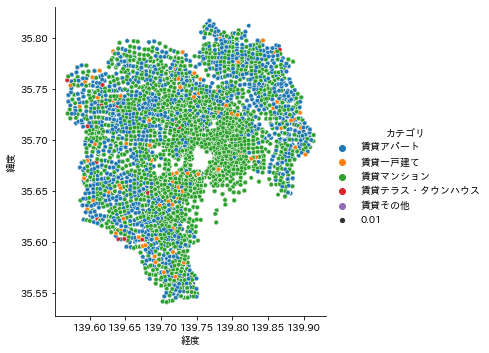

In [511]:
# 緯度経度散布図
# まさに東京23区

# sns.relplot(data=suumo_tokyo, x='経度', y='緯度', hue='カテゴリ', size=0.01)
# plt.show()

In [512]:
# せっかくなので23区も区役所から区名→住所→緯度経度変換したい
# 23区の区役所住所を取得
# csvに保存したので2回目は不要

# url = 'https://www.homemate-research-public.com/bc09/13100/list/'
# html = requests.get(url)
# soup = BeautifulSoup(html.content, 'html.parser')

In [513]:
# csvに保存したので2回目は不要

# 区名を取り出す
# ku_names = soup.find_all(class_='fa_name')
# names = []
# for item in ku_names:
#     name = item.text
#     names.append(name)

# # 住所を取り出す
# place = soup.find_all(class_='fa_inner')

# addresses = []
# for item in place:
#     address = item.find(class_='fa_address').find_all('span')[1].text
#     address = re.search('(東京都.+[０-９])|(東京都.+[0-9])',address).group()
#     addresses.append(address)

In [514]:
# 区名と住所の対応表
# csvに保存したので2回目は不要

# ku_addresses = np.c_[names,addresses]
# df_ku = pd.DataFrame(ku_addresses, columns=['区','住所'])
# df_ku = df_ku[df_ku['区'].str.contains('区役所$')]
# df_ku['区'] = df_ku['区'].map(lambda x: re.sub('(.+区)役所',r'\1',x))
# df_ku.to_csv('ku_addresses.csv', index=False)

In [515]:
# 区役所住所→区役所緯度経度
# csvに保存したので2回目は不要

# all_addresses = {}
# running_times = []
# i = 0

# for address in df_ku['住所']:
    
#     start = time.time()

#     coordinate = translate_address_coordinates(address)
#     all_addresses[address] = coordinate
#     time.sleep(1)
    
#     finish = time.time()
    
#     running_time = finish - start
#     running_times.append(running_time)

#     all_count = df_ku['住所'].shape[0]
#     print(f'{i}件目：{running_time}秒')
#     # 作業進捗
#     complete_ratio = round(i/all_count*100,3)
#     print(f'完了：{complete_ratio}%')
#     # 作業の残り時間目安を表示
#     running_mean = np.mean(running_times)
#     running_required_time = running_mean * (all_count - i)
#     hour = int(running_required_time/3600)
#     minute = int((running_required_time%3600)/60)
#     second = int(running_required_time%60)
#     print(f'残り時間：{hour}時間{minute}分{second}秒\n')
#     i += 1

In [516]:
# 区役所の住所と緯度経度のDataFrame
# csvに保存したので2回目は不要

# coordinates = pd.DataFrame(all_addresses).T
# coordinates.reset_index(inplace=True)
# coordinates.rename(columns={
#     'index':'住所',
#     0:'経度',
#     1:'緯度'
# }, inplace=True)
# coordinates.to_csv('ku_coordinates.csv',index=False)

In [517]:
# 区役所の住所と緯度経度対応表
# csvに保存したので2回目は不要

# all_sta_add = pd.read_csv('ku_addresses.csv')
# station_coordinates = pd.read_csv('ku_coordinates.csv')
# station_coordinates = pd.merge(all_sta_add, station_coordinates, on='住所', how='left')
# station_coordinates.to_csv('ku_coordinates.csv', index=False)

In [518]:
# 結合
ku_coordinates = pd.read_csv('ku_coordinates.csv')
# 名前が被らないように修正
ku_coordinates.rename(columns={
    '住所':'住所(区)',
    '緯度':'緯度(区)',
    '経度':'経度(区)'
}, inplace=True)

# 結合
suumo_tokyo = pd.merge(suumo_tokyo, ku_coordinates, left_on='市区町村', right_on='区',how='left')

In [519]:
# 最寄り駅変数（正規表現）

# 最寄り駅から路線と駅を取り出す
suumo_tokyo[['路線','駅']] = suumo_tokyo.apply(lambda x:re.search('(.+)/(.+?)\s(.+)',x.最寄り駅1).groups()[0:2],axis=1,result_type='expand')

def how_to_station():
    # 移動手段は3パターン
    how_to_station = ['歩','バス','車']
    for by in how_to_station:
        # 移動手段変数を生成
        suumo_tokyo[f'{by}'] = np.zeros(suumo_tokyo.shape[0])
        # その移動手段があるなら移動手段変数に格納する
        suumo_tokyo.loc[suumo_tokyo['最寄り駅1'].map(lambda x: search_object(f'{by}[0-9]+分',x)),f'{by}'] = suumo_tokyo.loc[suumo_tokyo['最寄り駅1'].map(lambda x: search_object(f'{by}[0-9]+分',x)),'最寄り駅1'].map(lambda x: re.search(f'{by}([0-9]+)分',x).group(1))
        # 所要時間をint型に変換
        suumo_tokyo[f'{by}'] = suumo_tokyo[f'{by}'].astype(int)

# 移動手段ごとに所用時間変数を作る
how_to_station()

In [520]:
# せっかくなので駅→住所→緯度経度変換できるようにしたい
# ここは駅に対応する住所を回収する場所
# csvに保存したので2回目は不要

# url = 'https://www.navitime.co.jp/category/0802001/13/?page={}'
# max_page = 44
# running_times = []
# soup_tank = []

# for page in range(1,max_page+1):
    
#     start = time.time()
    
#     load_url = url.format(page)
#     html = requests.get(load_url)
#     soup = BeautifulSoup(html.content, 'html.parser')
#     soup_tank.append(soup)
#     time.sleep(1)
    
#     finish = time.time()
    
#     running_time = finish - start
#     running_times.append(running_time)

#     all_count = max_page
#     print(f'{page}件目：{running_time}秒')
#     # 作業進捗
#     complete_ratio = round(page/all_count*100,3)
#     print(f'完了：{complete_ratio}%')
#     # 作業の残り時間目安を表示
#     running_mean = np.mean(running_times)
#     running_required_time = running_mean * (all_count - page)
#     hour = int(running_required_time/3600)
#     minute = int((running_required_time%3600)/60)
#     second = int(running_required_time%60)
#     print(f'残り時間：{hour}時間{minute}分{second}秒\n')

In [521]:
# 回収したhtmlデータから駅と住所の対応を回収する
# csvに保存したので2回目は不要

# all_sta_add = []

# for page in range(max_page):
#     stations = []
#     for item in soup_tank[page].find_all(class_='spot-name-text'):
#         stations.append(item.text)

#     addresses = []
#     for item in soup_tank[page].find_all(class_='spot-detail-value-text'):
#         isaddress = re.match('東京都',item.text)
#         if isaddress :
#             addresses.append(item.text)

#     sta_add = np.c_[stations, addresses]
    
#     if page == 0:
#         all_sta_add = sta_add
#     else:
#         all_sta_add = np.r_[all_sta_add,sta_add]
        
# # データをcsvに保存
# pd.DataFrame(all_sta_add,columns=['駅','住所']).to_csv('station_address.csv',index=False)

In [522]:
# 駅の住所→緯度経度の対応を回収したい
# csvに保存済なので2回目は不要

# all_addresses = {}
# running_times = []
# i = 0

# for address in all_sta_add['住所']:
    
#     start = time.time()

#     coordinate = translate_address_coordinates(address)
#     all_addresses[address] = coordinate
#     time.sleep(1)
    
#     finish = time.time()
    
#     running_time = finish - start
#     running_times.append(running_time)

#     all_count = all_sta_add['住所'].shape[0]
#     print(f'{i}件目：{running_time}秒')
#     # 作業進捗
#     complete_ratio = round(i/all_count*100,3)
#     print(f'完了：{complete_ratio}%')
#     # 作業の残り時間目安を表示
#     running_mean = np.mean(running_times)
#     running_required_time = running_mean * (all_count - i)
#     hour = int(running_required_time/3600)
#     minute = int((running_required_time%3600)/60)
#     second = int(running_required_time%60)
#     print(f'残り時間：{hour}時間{minute}分{second}秒\n')
#     i += 1

In [523]:
# 駅の住所と緯度経度のDataFrame
# csvに保存済なので2回目は不要

# coordinates = pd.DataFrame(all_addresses).T
# coordinates.reset_index(inplace=True)
# coordinates.rename(columns={
#     'index':'住所',
#     0:'経度',
#     1:'緯度'
# }, inplace=True)
# coordinates.to_csv('station_coordinates.csv',index=False)

In [524]:
# 駅の住所と緯度経度対応表
# csvに保存したので2回目は不要

# all_sta_add = pd.read_csv('station_address.csv')
# station_coordinates = pd.read_csv('station_coordinates.csv')
# station_coordinates = pd.merge(all_sta_add, station_coordinates, on='住所', how='left')
# station_coordinates.to_csv('station_coordinates.csv', index=False)

In [525]:
# 適切に結合するための修正
# 修正を保存したので2回目は不要

# station_coordinates = pd.read_csv('station_coordinates.csv')

# # ()つきを圧縮する
# station_coordinates.loc[station_coordinates['駅'].map(lambda x: search_object('(.*?)(\(.+?\))(.*?)',x)),'駅'] = station_coordinates.loc[station_coordinates['駅'].map(lambda x: search_object('(.*?)(\(.+?\))(.*?)',x)),'駅'].map(lambda x: re.sub('(.*?)(\(.+?\))(.*?)',r'\1\3',x) )
# # 〔〕|[]つきを圧縮する
# station_coordinates.loc[station_coordinates['駅'].map(lambda x: search_object('(.*?)(〔|\[)(.+)(〕|\])(.*?)',x)),'駅'] = station_coordinates.loc[station_coordinates['駅'].map(lambda x: search_object('(.*?)(〔|\[)(.+)(〕|\])(.*?)',x)),'駅'].map(lambda x: re.sub('(.*?)(〔|\[)(.+)(〕|\])(.*?)',r'\1\5',x) )
# # ヶはケに変える
# station_coordinates.loc[station_coordinates['駅'].map(lambda x: search_object('ヶ',x)),'駅'] = station_coordinates.loc[station_coordinates['駅'].map(lambda x: search_object('ヶ',x)),'駅'].map(lambda x: re.sub('ヶ','ケ',x))

# # 重複列を削除する（ほぼ同じ住所になると信じることにする）
# station_coordinates = station_coordinates[~station_coordinates['駅'].duplicated()]
# # # 加工した状態で保存
# station_coordinates.to_csv('station_coordinates.csv' ,index=False)

In [526]:
# 結合
station_coordinates = pd.read_csv('station_coordinates.csv')
# 名前が被らないように修正
station_coordinates.rename(columns={
    '住所':'住所(駅)',
    '緯度':'緯度(駅)',
    '経度':'経度(駅)'
}, inplace=True)
# 〇〇駅に名称を変換
station_coordinates['駅'] = station_coordinates['駅'].map(lambda x: x+'駅')

# ヶはケに変える
suumo_tokyo.loc[suumo_tokyo['駅'].map(lambda x: search_object('ヶ',x)),'駅'] = suumo_tokyo.loc[suumo_tokyo['駅'].map(lambda x: search_object('ヶ',x)),'駅'].map(lambda x: re.sub('ヶ','ケ',x))
# 結合
suumo_tokyo = pd.merge(suumo_tokyo, station_coordinates, on='駅', how='left')

In [531]:
# 順番を見やすいように入れ替える
columns = ['カテゴリ','建物名','経度','緯度','都道府県','市区町村','市区町村以下','経度(区)', '緯度(区)','路線','駅', '経度(駅)', '緯度(駅)','歩','バス','車','築年数','地上','地下','階数','階','賃料','管理費','敷金','礼金','間取り','専有面積','url']
suumo_tokyo_shaped = suumo_tokyo[columns]
# 重複を削除する（重複10000くらいありましたね…）
suumo_tokyo_shaped = suumo_tokyo_shaped[suumo_tokyo_shaped.duplicated() == False]
# 保存
suumo_tokyo_shaped.to_csv('SuumoTokyoShaped20221018.csv', index=False)

In [532]:
suumo = pd.read_csv('SuumoTokyoShaped20221018.csv')

In [533]:
# 駅の住所緯度経度を埋められなかった皆さん
suumo.loc[suumo['緯度(駅)'].isnull(),'駅'].unique()
# 谷塚：埼玉県
# 八潮：埼玉県
# 大泉風致地区：練馬区にある公園
# 和光市駅：埼玉県
# 伊興赤山：足立区にあるバス停
# 浦安駅：千葉県
# 大泉学園町４丁目：練馬区の一角

array(['谷塚駅', '八潮駅', '大泉風致地区', '和光市駅', '伊興赤山', '浦安駅', '大泉学園町４丁目'],
      dtype=object)

In [14]:
import geocoder
location = '東京都大田区南蒲田3'
ret = geocoder.osm(location, timeout=5.0)
print(ret.latlng)
print(ret.address)

None
None
